<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/1_DeepLearning_Fundaments/clase_2_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks
## Parte 1, TensorFlow 2
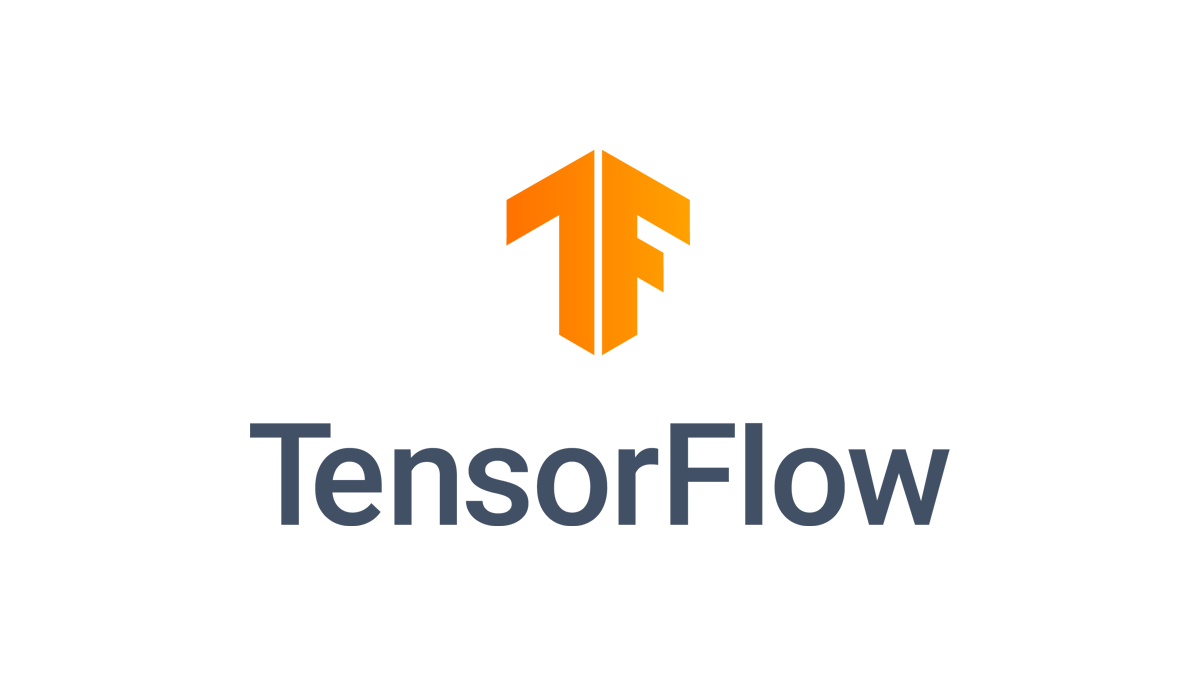


### Sobre el dataset
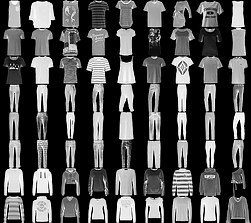

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()


Para revisar sobre las etiquetas: [Etiquetas del Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

In [ ]:
class_names = ['Polera', 'Pantalon', 'Sueter', 'Vestido', 'Abrigado', 'Sandalia', 'Camisa', 'Sneaker', 'Mochila', 'Bota']

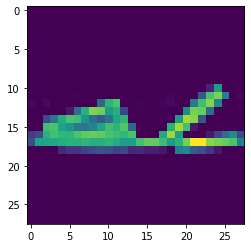

In [ ]:
plt.figure() 
plt.imshow(np.squeeze(train_images[320]))

### Holdout
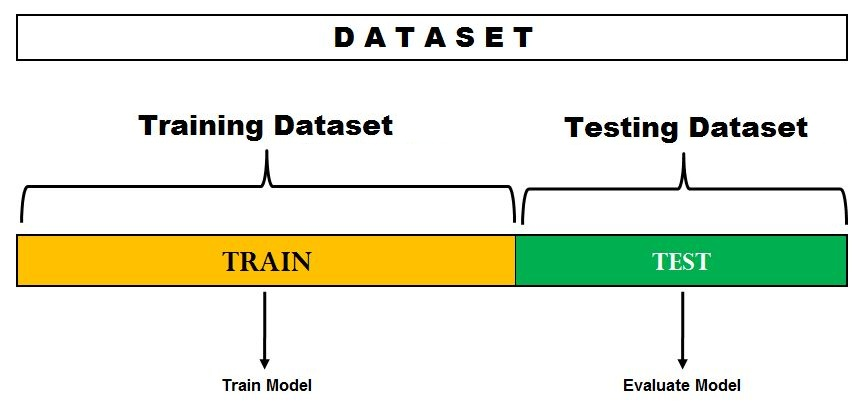

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

### Normalizamos el dataset
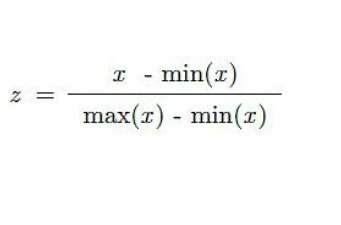

In [ ]:
# poner codigo acá

### Neural Network
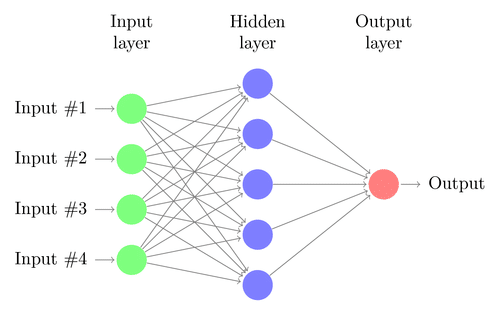

In [ ]:
# poner codigo acá

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Recordando los optimizadores

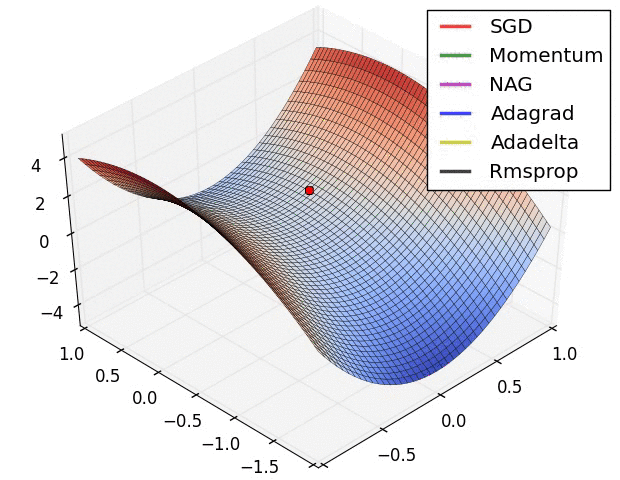

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4999 - accuracy: 0.8263
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8645
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3386 - accuracy: 0.8772
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8905
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.8993
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9071
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8895
Test accuracy: 0.8895000219345093


## Parte 2, PyTorch
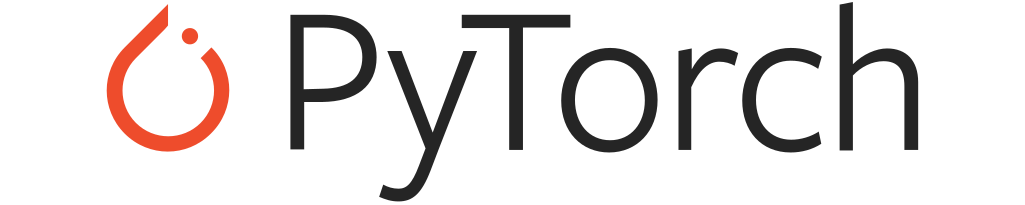

### Sobre el dataset
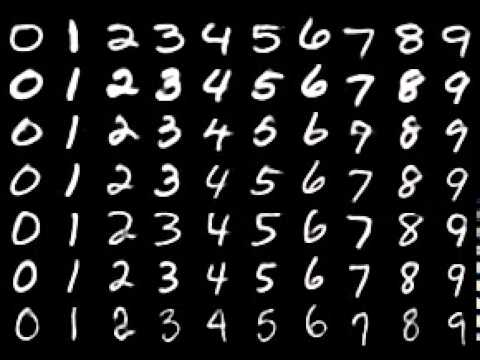

In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
batch_size = 20


# Con este paso convertimos los datos en tipo torch.FloatTensor
transform = transforms.ToTensor()


# Elegimos los datos de entrenamiento y testeo de torchvision
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)

# Preparamos los data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)

In [ ]:
dataiter = iter(train_loader) #con esto obtenemos un batch de las imagenes
images, labels = dataiter.next()
images = images.numpy()

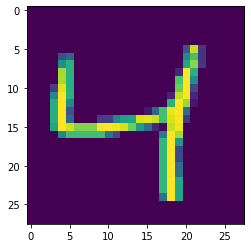

In [ ]:
plt.figure() 
plt.imshow(np.squeeze(images[2]))

### ¿Cómo se ven a detalle los números?
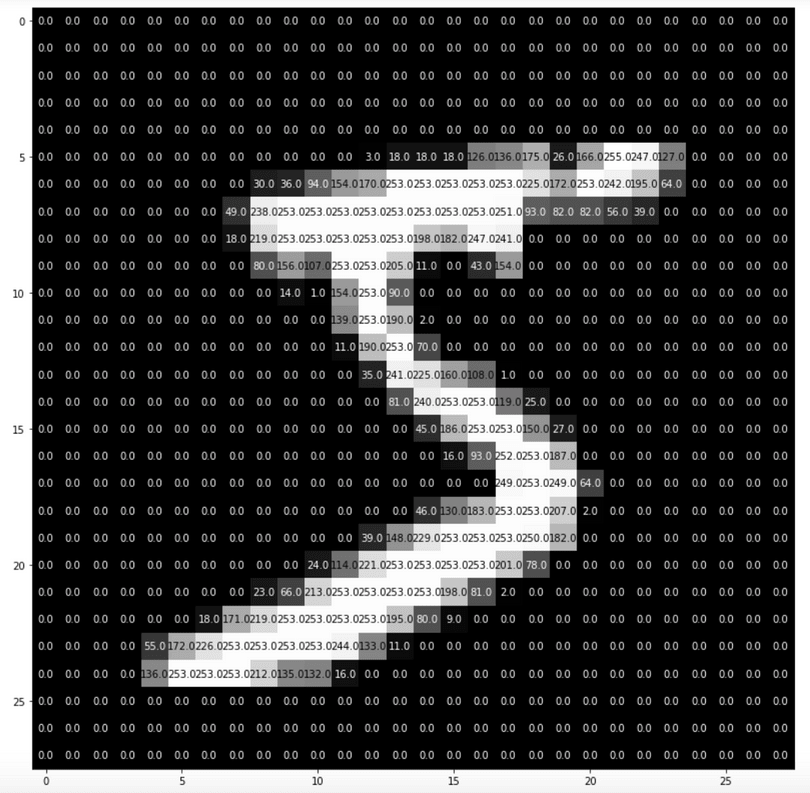

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

# poner codigo acá


In [ ]:
modelo = RedNeuronal()
print(modelo)

RedNeuronal(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.01)

In [ ]:
epochs = 5
modelo.train() 

for epoch in range(epochs):

    train_loss = 0.0

    for data, target in train_loader:

        optimizer.zero_grad()
        output = modelo(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    
    train_loss = train_loss/len(train_loader.dataset)

    print(f'Epoch: {epoch+1} \tTraining Loss: {train_loss}')

Epoch: 1 	Training Loss: 0.2751922265600685
Epoch: 2 	Training Loss: 0.20011878653151569
Epoch: 3 	Training Loss: 0.1794194715172198
Epoch: 4 	Training Loss: 0.16603035338292746
Epoch: 5 	Training Loss: 0.16266249729160367


In [ ]:
test_loss = 0.0


modelo.eval()

for data, target in test_loader:
    
    salida = modelo(data)
    loss = criterion(salida, target)
    test_loss += loss.item()*data.size(0)

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 0.279934



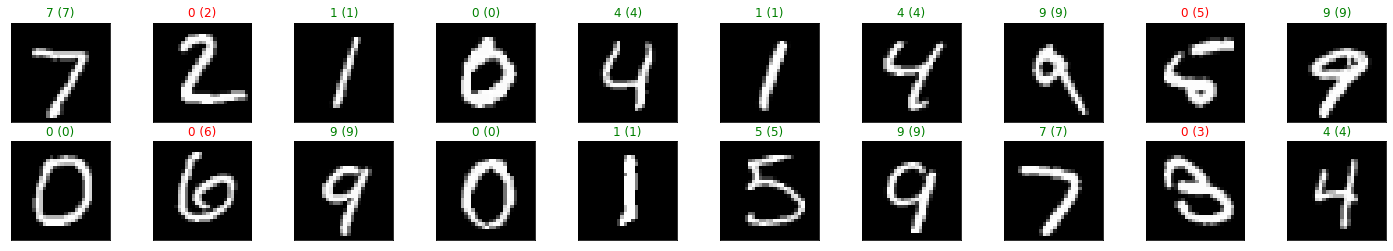

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = modelo(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
m  